In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import os

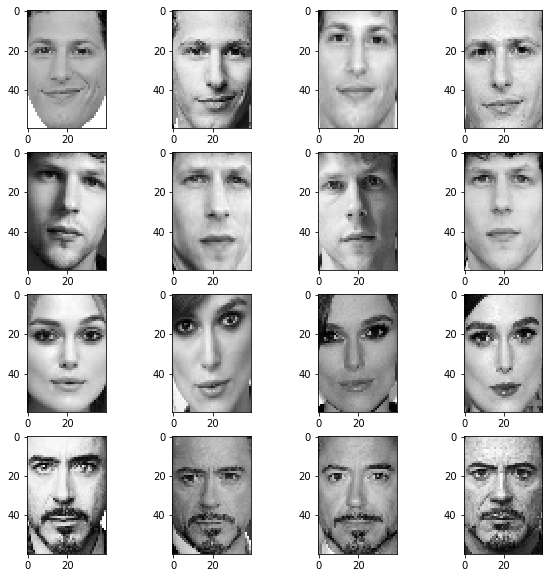

In [2]:
fig, ax = plt.subplots(4, 4, figsize=(10,10))

# Helper function to scale images to a uniform length and convert to grayscale
def preprocess_face(img):
    temp = cv2.imread(img)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    temp = cv2.resize(temp, (40,60))
    return cv2.normalize(temp.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

img_list = []

# get data from file and add to img_list
for file in glob.glob('eigenface_images/*_face.jpg'):    
    img_list.append(preprocess_face(file))

# Plot the data
r = 0
c = 0

for img in img_list:
    ax[c,r].imshow(img, cmap="gray")
    
    # Controls plotting order
    if(r<3):
        r+=1
    else:
        r=0
        c+=1

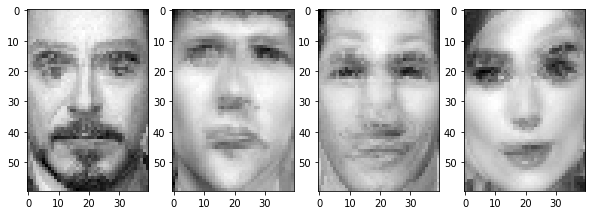

In [3]:
# Lets get the average face for each person
avg_asb = (img_list[0] + img_list[1] + img_list[2] + img_list[3])/4
avg_jeb = (img_list[4] + img_list[5] + img_list[6] + img_list[7])/4
avg_kn = (img_list[8] + img_list[9] + img_list[10] + img_list[11])/4
avg_rdj = (img_list[12] + img_list[13] + img_list[14] + img_list[15])/4

ax, fig = plt.subplots(1,4, figsize=(10,10))
fig[0].imshow(avg_rdj, cmap="gray")
fig[1].imshow(avg_jeb, cmap="gray")
fig[2].imshow(avg_asb, cmap="gray")
fig[3].imshow(avg_kn, cmap="gray")
plt.show()

In [4]:
# Make array of unrolled images 
A = []
 
for img in img_list:
    A.append(img.flatten())
    
A = np.array(A)
A.shape

(16, 2400)

In [5]:
# Center the data around the origin
A = A - np.mean(A)
A.shape

(16, 2400)

In [6]:
# Generate the covariance matrix
C = A.T@A

In [7]:
U,D,Vt = np.linalg.svd(C)

In [8]:
Vt.shape

(2400, 2400)

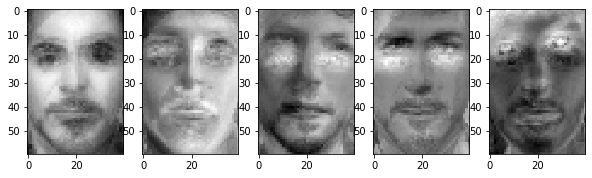

In [9]:
# Top N eigenfaces that are correlated with our 16 images
N = 5

fig, ax = plt.subplots(1, N, figsize=(10,10))

for i in range(N):
    # We state U.T below because each face is a row vector
    face_i = np.resize((U.T)[i,:],(60,40))
    ax[i].imshow(face_i, cmap="gray")


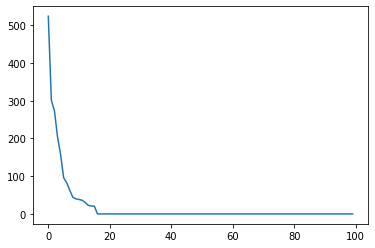

In [10]:
# We can see that that roughly the largest 20 eigenvalues 
#  contribute significantly to the image
plt.plot(D[:100])
plt.show()

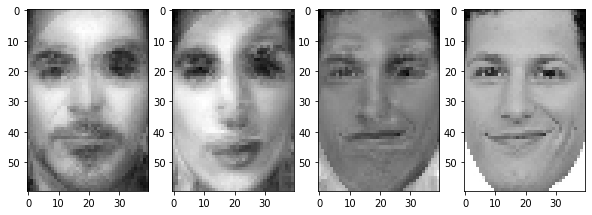

In [11]:
# Rank r approximation of a face can be achieved by the 
#    linear combination of the first r eigenfaces
  
X_input = A[0,:].reshape(2400,1) 

# Testing a few r values
fig, ax = plt.subplots(1, 4, figsize=(10,10))
r_levels = [2, 5, 10, 20]

for index, r_val in enumerate(r_levels):
    U_reduce = U[:,:r_val] # 2400xr
    # U_reduce.T @ X_input encodes the data into a lower dimension
    # U_reduce @U_reduce.T @ X_input encodes and decodes the data back
    Z = U_reduce@U_reduce.T@X_input
    ax[index].imshow(np.resize(Z, (60,40)), cmap="gray")


In [17]:
# We will now project the images onto V and compare features
# The first j columns ov V transpose show the linear 
proj_asb = np.resize(avg_asb, (1,60*40))@Vt
proj_jeb = np.resize(avg_jeb, (1,60*40))@Vt
proj_kn = np.resize(avg_kn, (1,60*40))@Vt
proj_rdj = np.resize(avg_rdj, (1,60*40))@Vt


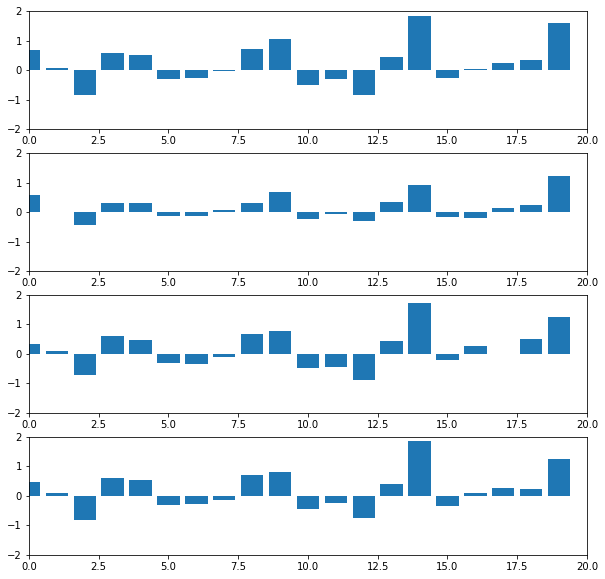

In [18]:
ax, fig = plt.subplots(4, 1, figsize=(10,10))

# We can see how each person is represented in the lower dimension
# Columns of Vt give correct linear combination to transform eigenface to desired target
fig[0].bar(np.arange(20),proj_asb[0,:20])
fig[1].bar(np.arange(20),proj_jeb[0,:20])
fig[2].bar(np.arange(20),proj_kn[0,:20])
fig[3].bar(np.arange(20),proj_rdj[0,:20])

for i in range(4):
    fig[i].set_xlim([0, 20])
    fig[i].set_ylim([-2, 2])